# Making a Database for Catherine out of the PopSyCLE Data with Natasha's OGLE cuts


> Here's the table with mock-OGLE EWS cuts implemented. The fields are merged and I also added in the companion parameters into this table for convenience. This is the `all_fields_Mrun_EWS_w_comp_params.fits` file.
>
> The columns of the event table are described here [https://popsycle.readthedocs.io/en/latest/source/popsycle_docs.html](https://popsycle.readthedocs.io/en/latest/source/popsycle_docs.html) (see the `event_table` description in `calc_events`, `refine_events`, and `refine_binary_events`). There's now also all the columns from the companion tables added. All the values for the binary lens companions are `comp_L_<column>` and for the source `comp_S_<column>` in the attached event table. If there's no companion the values are all set to `nan`.
>
> Note that we actually do include triples in a rudimentary way, but the companion parameters that are chosen for each lens and source here are the companion that corresponded to the lightcurve with the highest bump magnitude (`delta_m`). If you want the full detail of the companions and the lightcurves simulated, I attached the uncut companion and lightcurve tables. (see section 2.2.5 and Appendix B and C for details [https://ui.adsabs.harvard.edu/abs/2025ApJ...980..103A/abstract](https://ui.adsabs.harvard.edu/abs/2025ApJ...980..103A/abstract)).
> 
> Note also that since there are multiple fields combined here that the `obj_id_L`, `obj_id_S`, and `companion_ids` are no longer unique. You need to cross reference with the `field_id` column if you want to combine the tables.
> 
> I know this can be a bit complicated/confusing, so let me know if you have more questions!
>
> Best,
>
> Natasha


In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np

## Load the `all_fields_Mrun_EWS_w_comp_params.fits` file

In [12]:
# Path to your FITS file
fits_file = 'data/all_fields_Mrun_EWS_w_comp_params.fits'

with fits.open(fits_file) as hdul:
    hdul.info()
    data = hdul[1].data
    # Convert to numpy array and change byte order to native (little-endian)
    data_array = np.array(data).byteswap().view(data.dtype.newbyteorder('='))
    df = pd.DataFrame(data_array)

df.head()

Filename: data/all_fields_Mrun_EWS_w_comp_params.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    342   5898R x 164C   [K, K, D, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, I, D, D, D, D, D, D, D, D, D, D, D, D, D, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 28A, 6A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


,obj_id_L,obj_id_S,age_L,popid_L,zams_mass_L,mass_L,systemMass_L,px_L,py_L,pz_L,...,comp_S_omega,comp_S_q,comp_S_sep,comp_S_P,comp_S_obj_id_L,comp_S_obj_id_S,comp_S_alpha,comp_S_phi_pi_E,comp_S_phi,comp_S_companion_idx
0,493856,11630673,9.647691,4,0.108094,0.108094,0.108094,1.046219,0.143427,0.084485,...,21.468162,0.665088,0.002759,0.004897,493856.0,11630673.0,145.180702,351.565936,153.614765,54.0
1,1871302,12431899,9.905573,6,0.310635,0.310635,0.310635,4.250701,0.585845,0.370213,...,225.949123,1.479937,1.569128,74.105185,1871302.0,12431899.0,45.090036,65.191924,339.898111,136.0
2,2250630,2903857,9.981004,6,0.635183,0.634982,0.634982,1.753730,0.247231,0.148651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2350514,2595276,9.997058,6,0.092799,0.092799,0.092799,0.496960,0.067016,0.040720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2529087,3000108,10.041392,7,0.116832,0.116832,0.116832,4.147659,0.586472,0.342430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
col_string = ', '.join(f'`{col}`' for col in df.columns)

with open('data/column_names.txt', 'w') as f:
    f.write(col_string)

**Column names:**

`obj_id_L`, `obj_id_S`, `age_L`, `popid_L`, `zams_mass_L`, `mass_L`, `systemMass_L`, `px_L`, `py_L`, `pz_L`, `vx_L`, `vy_L`, `vz_L`, `exbv_L`, `glat_L`, `glon_L`, `mbol_L`, `grav_L`, `teff_L`, `feh_L`, `rad_L`, `isMultiple_L`, `N_companions_L`, `rem_id_L`, `ubv_J_L`, `ubv_H_L`, `ubv_K_L`, `ubv_U_L`, `ubv_I_L`, `ubv_B_L`, `ubv_V_L`, `ubv_R_L`, `vr_L`, `mu_b_L`, `mu_lcosb_L`, `sep_L`, `age_S`, `popid_S`, `zams_mass_S`, `mass_S`, `systemMass_S`, `px_S`, `py_S`, `pz_S`, `vx_S`, `vy_S`, `vz_S`, `exbv_S`, `glat_S`, `glon_S`, `mbol_S`, `grav_S`, `teff_S`, `feh_S`, `rad_S`, `isMultiple_S`, `N_companions_S`, `rem_id_S`, `ubv_J_S`, `ubv_H_S`, `ubv_K_S`, `ubv_U_S`, `ubv_I_S`, `ubv_B_S`, `ubv_V_S`, `ubv_R_S`, `vr_S`, `mu_b_S`, `mu_lcosb_S`, `sep_S`, `theta_E`, `u0`, `mu_rel`, `t0`, `t_E`, `ubv_I_app_S`, `ubv_I_app_L`, `cent_glon_I_N`, `cent_glat_I_N`, `ubv_I_app_N`, `ubv_I_app_LSN`, `delta_m_I`, `f_blend_I`, `pi_rel`, `pi_E`, `pps_seed`, `gal_seed`, `n_peaks`, `bin_delta_m`, `tE_sys`, `tE_primary`, `primary_t`, `avg_t`, `std_t`, `asymmetry`, `companion_idx_list`, `field_id`, `observable_n_peaks`, `comp_L_zams_mass`, `comp_L_Teff`, `comp_L_L`, `comp_L_logg`, `comp_L_isWR`, `comp_L_mass`, `comp_L_phase`, `comp_L_metallicity`, `comp_L_m_ubv_U`, `comp_L_m_ubv_B`, `comp_L_m_ubv_V`, `comp_L_m_ubv_I`, `comp_L_m_ubv_R`, `comp_L_m_ukirt_H`, `comp_L_m_ukirt_K`, `comp_L_m_ukirt_J`, `comp_L_m_ztf_g`, `comp_L_m_ztf_r`, `comp_L_m_ztf_i`, `comp_L_log_a`, `comp_L_e`, `comp_L_i`, `comp_L_Omega`, `comp_L_omega`, `comp_L_q`, `comp_L_sep`, `comp_L_P`, `comp_L_obj_id_L`, `comp_L_obj_id_S`, `comp_L_alpha`, `comp_L_phi_pi_E`, `comp_L_phi`, `comp_L_companion_idx`, `comp_S_zams_mass`, `comp_S_Teff`, `comp_S_L`, `comp_S_logg`, `comp_S_isWR`, `comp_S_mass`, `comp_S_phase`, `comp_S_metallicity`, `comp_S_m_ubv_U`, `comp_S_m_ubv_B`, `comp_S_m_ubv_V`, `comp_S_m_ubv_I`, `comp_S_m_ubv_R`, `comp_S_m_ukirt_H`, `comp_S_m_ukirt_K`, `comp_S_m_ukirt_J`, `comp_S_m_ztf_g`, `comp_S_m_ztf_r`, `comp_S_m_ztf_i`, `comp_S_log_a`, `comp_S_e`, `comp_S_i`, `comp_S_Omega`, `comp_S_omega`, `comp_S_q`, `comp_S_sep`, `comp_S_P`, `comp_S_obj_id_L`, `comp_S_obj_id_S`, `comp_S_alpha`, `comp_S_phi_pi_E`, `comp_S_phi`, `comp_S_companion_idx`

Select every row where the `comp_S_mass` column (or any `comp_S_ column`) is NOT `nan`.

In [14]:
# Select columns that start with 'comp_S_'
comp_S_cols = [col for col in df.columns if col.startswith('comp_S_')]

# Select rows where any of these columns is not NaN
filtered_df = df[df[comp_S_cols].notna().any(axis=1)]

filtered_df.head()
comp_n = filtered_df.shape
N = df.shape
print(f"Number of rows with companion: {comp_n[0]}")
print(f"Number of rows without companion: {N[0] - comp_n[0]}")
print(f"Sample size: {N[0]}")
comp_percent = comp_n[0] / N[0] * 100
print(f"Percentage of rows with companion: {comp_percent:.2f}%")


Number of rows with companion: 2389
Number of rows without companion: 3509
Sample size: 5898
Percentage of rows with companion: 40.51%


Now for the fun part: target acquisition. I've scanned the list. As I suspected, some of what you want is hiding in plain sight, and some of it requires a little... calculation. Amateurs look for a column; we *create* it.

### Your Target List & Where They're Hiding

Here is the map from what you want to the column names in that file.

  * **`M_L` (Lens Mass):** `mass_L`.
  * **`D_L` (Lens Distance):** *Calculation needed.* Use `px_L`, `py_L`, `pz_L`.
  * **`D_S` (Source Distance):** *Calculation needed.* Use `px_S`, `py_S`, `pz_S`.
  * **`I_S` (Souce I Magnitude):** `ubv_I_S`
  * **`mu_rel` (Relative Proper Motion):** `mu_rel`.
  * **`theta_E` (Einstein Radius):** `theta_E`.
  * **`u0` (Impact Parameter):** `u0`.
  * **`binary_sep_au` (Projected):** `comp_S_sep`.
  * **`binary_sep_arcsec` (Angular):** *Calculation needed.* Use `comp_S_sep` and the source distance.
  * **`binary_log_a_au` (log Source Semi-Major Axis):** `comp_S_log_a`. 
  * **`binary_a_au` (Source Semi-Major Axis):** *Calculation needed.* Use `comp_S_log_a`.
  * **`binary_alpha_deg` (Source-Binary Orientation):** `comp_S_alpha`.
  * **`ra`, `dec`:** You don't have RA/Dec. You have Galactic coordinates: `glon_S`, `glat_S`. We'll use those. Converting is a separate battle.

Simple. Now let's put it in a language this notebook understands.

### A Final Warning

As I said, you have **Galactic Coordinates (`glon_S`, `glat_S`)**, not RA/Dec. This is fine, but you need to be aware of what coordinate system you're working in. If you need RA/Dec, you'll have to do a coordinate transformation, but let's not borrow trouble. Anyway, `astropy` can handle it pretty easily.

## Calculate the Columns That Don't Exist Yet 

In [15]:
filtered_df_with_calcs = filtered_df.copy()

# Let's add the columns we need to calculate directly to your dataframe.
print(f"Starting with {len(filtered_df_with_calcs)} binary source events. Now, let's add the good stuff...")

# Distances are in kpc. We calculate them from the 3D positions.
# D = sqrt(px^2 + py^2 + pz^2)
filtered_df_with_calcs['D_L'] = np.sqrt(filtered_df_with_calcs['px_L']**2 + filtered_df_with_calcs['py_L']**2 + filtered_df_with_calcs['pz_L']**2)
filtered_df_with_calcs['D_S'] = np.sqrt(filtered_df_with_calcs['px_S']**2 + filtered_df_with_calcs['py_S']**2 + filtered_df_with_calcs['pz_S']**2)
filtered_df_with_calcs['binary_a_au'] = 10 ** filtered_df_with_calcs['comp_S_log_a']

# Now, the angular separation for the source binary in arcseconds.
# The formula is: ang_sep[arcsec] = phys_sep[AU] / distance[parsecs]
# We convert distance from kpc to pc by multiplying by 1000.
filtered_df_with_calcs['binary_angular_separation'] = filtered_df_with_calcs['comp_S_sep'] / (filtered_df_with_calcs['D_S'] * 1000)


Starting with 2389 binary source events. Now, let's add the good stuff...


## Select and Rename to Create the Final, Clean Table

In [ ]:
# This is our blueprint for the final product. No junk allowed.
final_columns = {
    'mass_L': 'M_L',
    'D_L': 'D_L_kpc',
    'D_S': 'D_S_kpc',
    'mu_rel': 'mu_rel_mas_yr',
    'theta_E': 'theta_E_mas',
    'u0': 'u0',  # The impact parameter, in units of thet
    'comp_S_sep': 'binary_sep_au', # The physical separation in AU
    'comp_S_log_a': 'binary_log_a_au', 
    'binary_a_au': 'binary_a_au',
    'comp_S_alpha': 'binary_alpha_deg',
    'binary_angular_separation': 'binary_sep_arcsec', # The angular separation
    'glon_S': 'gal_lon_S_deg',
    'glat_S': 'gal_lat_S_deg',
    'ubv_I_S': 'I_S',
    'mu_b_L': 'mu_b_L',
    'mu_lcosb_L': 'mu_lcosb_L',
    'mu_b_S': 'mu_b_S',
    'mu_lcosb_S': 'mu_lcosb_S'
}

# Create the final table from your filtered data.
# This selects ONLY the columns we want and renames them.
renamed_table = filtered_df_with_calcs[list(final_columns.keys())].rename(columns=final_columns)

renamed_table.head()

KeyError: "['mu_L_b', 'mu_L_lcosb', 'mu_S_b', 'mu_S_lcosb'] not in index"

## Save the Final Table

In [17]:
# save the final table to a csv file with a header
renamed_table.to_csv('data/popsycle_table_with_calcs.csv', index=False)

## How to Use this Table

In [18]:
# Load the table
table = pd.read_csv('data/popsycle_table_with_calcs.csv')

# Print the first few rows of the table
print(table.head())
print(table.shape)

        M_L   D_L_kpc    D_S_kpc  mu_rel_mas_yr  theta_E_mas        u0  \
0  0.108094  1.059379   8.349576      14.859446     0.850656  0.457256   
1  0.310635  4.306824   7.832075      11.668156     0.513506 -1.884719   
2  0.119087  4.632275  10.512844       4.986551     0.341765 -0.076806   
3  0.256288  6.178383   7.294702       2.289019     0.227061  1.102258   
4  0.109863  6.538958   8.791398       8.926219     0.186987  1.132633   

   binary_sep_au  binary_log_a_au  binary_a_au  binary_alpha_deg  \
0       0.002759        -1.456608     0.034946        145.180702   
1       1.569128         1.339302    21.842480         45.090036   
2       0.010222         0.268963     1.857648        139.491598   
3       0.068878         0.612039     4.092978        291.545738   
4      21.375443         2.445328   278.822644         75.633166   

   binary_sep_arcsec  gal_lon_S_deg  gal_lat_S_deg       I_S  
0       3.304900e-07       7.806116       4.574181  5.443714  
1       2.003464e-04

In [19]:
# how to use one column
D_L = table['D_L_kpc']

In [20]:
# how to filter the table
table_filtered = table[table['D_L_kpc'] < 10]

# how to add a new column
table['D_L_pc'] = table['D_L_kpc'] * 1000

In [12]:
# how to make a numpy array
D_L_array = table['D_L_kpc'].to_numpy()

In [13]:
# Create a DataFrame with phi values from 0 to 179 (inclusive)
phi_values = pd.DataFrame({'phi': np.arange(0, 180, 1)})

# Add a temporary key to both DataFrames for the cross join
table['key'] = 1
phi_values['key'] = 1

# Perform the cross join
expanded_table = pd.merge(table, phi_values, on='key').drop('key', axis=1)

# Now, expanded_table contains every row of 'table' repeated for each phi value

# Using .to_numpy() (recommended)
array = expanded_table.to_numpy()

# Or, equivalently:
# array = expanded_table.values

print(array)

[[1.08094245e-01 1.05937888e+00 8.34957595e+00 ... 4.57418149e+00
  1.05937888e+03 0.00000000e+00]
 [1.08094245e-01 1.05937888e+00 8.34957595e+00 ... 4.57418149e+00
  1.05937888e+03 1.00000000e+00]
 [1.08094245e-01 1.05937888e+00 8.34957595e+00 ... 4.57418149e+00
  1.05937888e+03 2.00000000e+00]
 ...
 [5.31918201e-01 7.88608313e+00 9.37316887e+00 ... 2.27641512e+00
  7.88608313e+03 1.77000000e+02]
 [5.31918201e-01 7.88608313e+00 9.37316887e+00 ... 2.27641512e+00
  7.88608313e+03 1.78000000e+02]
 [5.31918201e-01 7.88608313e+00 9.37316887e+00 ... 2.27641512e+00
  7.88608313e+03 1.79000000e+02]]


This is just an example. Obviously, you will need more columns than this.

In [14]:
# ensure a datatype and select the columns we want
array_typed = expanded_table[['D_L_kpc', 'D_S_kpc', 'phi']].to_numpy(dtype=float)

print(array_typed.shape)

(430020, 3)


You can use this kind of repeating array to avoid loops in your calculations.

## Sanity Checks

<!-- from astropy.io import fits
fits_file = 'data/all_fields_Mrun_EWS_w_comp_params.fits'
with fits.open(fits_file) as hdul:
    data = hdul[1].data
    data_array = np.array(data).byteswap().view(data.dtype.newbyteorder('='))
    df = pd.DataFrame(data_array) -->

The `a` (semi-major axis) should not be greater than `sep` (projected separation). The code above prints the number of cases where this is violated.

In [15]:
mask = table['binary_a_au'] > table['binary_sep_au']
print(f'Number of cases where a > sep: {mask.sum()} / {len(table)}')

Number of cases where a > sep: 2389 / 2389




**Histograms:** For `binary_log_a_au` and `binary_sep_au` to help you visually inspect the distributions.

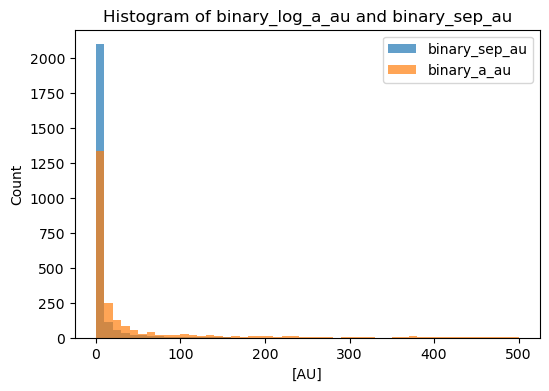

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(table['binary_sep_au'].dropna(), range=(0, 500), bins=50, alpha=0.7, label='binary_sep_au')
plt.hist(table['binary_a_au'].dropna(), range=(0, 500), bins=50, alpha=0.7, label='binary_a_au')
plt.xlabel('[AU]')
plt.ylabel('Count')
plt.title('Histogram of binary_log_a_au and binary_sep_au')
plt.legend()
plt.show()

Looks good!

## Units

Be careful that the unit's in this table match those your code is expecting. Forgetting your units is a sin you don't want to commit. It's the difference between a discovery and a disaster.

| Your Column Name | Original Column(s) | Units |
| :--- | :--- | :--- |
| `M_L` | `mass_L` | Solar Masses ($M_\odot$) |
| `D_L_kpc` | `px_L`, `py_L`, `pz_L` | Kiloparsecs (kpc) |
| `D_S_kpc` | `px_S`, `py_S`, `pz_S` | Kiloparsecs (kpc) |
| `mu_rel_mas_yr` | `mu_rel` | Milliarcseconds per year (mas/yr) |
| `theta_E_mas` | `theta_E` | Milliarcseconds (mas) |
| `u0` | `u0` | $\theta_E$ |
| `binary_sep_au` | `comp_S_sep` | Astronomical Units (au) |
| `binary_sep_arcsec`| `comp_S_sep`, `D_S` | **Arcseconds (")** |
| `binary_log_a_au` | `comp_S_log_a` | log10(semi-major axis/AU) |
| `binary_a_au`  | `comp_S_log_a`  | Semi-major axis (AU) |
| `binary_alpha_deg` | `comp_S_alpha` | Orientation angle (deg) |
